
# Project: Investigate The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  This data set contains information about 10,000 movies collected from The Movie Database (TMDb) which is taken from (IMDB), the data is catigorized into columns as following: <br />
**id**: The movie Id accoring to TMDb.<br />
**imdb_id**: The movie Id accoring to IMDB website.<br />
**popularity** : a movie polularaty mertic based on several factors. they are: Number of votes for the day, Number of views for the day,Number of users who marked it as a "favourite" for the day, Number of users who added it to their "watchlist" for the day,Release date,Number of total votes, and Previous days score.<br />
**budget** : The budget of the movie.<br />
**revenue** : The revenue of the movie.<br />
**original_title** : The original title of the movie.<br />
**cast** : The movie cast in order of apperance.<br />
**homepage** : The website homepage of the movie.<br />
**director** : The name of the director of the movie.<br />
**tagline**	: The movie Tagline.<br />
**overview** :The overview of the movies story.<br />
**runtime**	: The actual movie runtime.<br />
**genres** : The genres of the movie.<br />
**production_companies** : The production companies behind the movie.<br />
**release_date** : THe release data of the movie.<br />
**vote_count** : The number of review votes for the movie.<br />
**vote_average** : The review score for the movie.<br />
**release_year** : The release year of the movie.<br />
**budget_adj**	: The budget.<br />
**revenue_adj** : The revenue.<br />
**The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.** <br />
**Note:** i found out about using $<br />$ for spaces from this [link](https://stackoverflow.com/questions/44810511/how-to-add-empty-spaces-into-md-markdown-readme-on-github) 

### Question(s) for Analysis
>What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over 100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.
<br />
**Q1:** what is the relashionship between review score and budget? <br />
**Q2:** what is the relashionship between review score and popularity <br />
**Q3:** what is the relashionship between review score and revenue <br />
**Q4:** what is the relashionship between popularity and revenue <br />
**Q5:** what is the relashionship between popularity and budget <br />

In [29]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [30]:
# Loading the dataset and printing out a few lines to get a better understanding of the data
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>So we have 21 columns and just by looking at the data i can see that i can drop a few columns that will not affect our analysis.

In [31]:
#Inspecting the data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>So a lot of the data needs further investigations but i will do so once i drop a few columns that i wont need. cast has a lot of missing data, homepage as well but i will drop it, directors also have a lot of missing info, tagline, keywords, and overview but they will be dropped as well, genres has some missing data, production has alot of missing data.

In [32]:
df.shape

(10866, 21)

>We have 21 columns and 10866 rows

In [33]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>The popularity is in floats which is expected and understandable. The budget, revenu, are integers, runtime, vote_count and relese_year are all integers. the rest are objects and wil need further investigations.

In [34]:
type(df['original_title'][0])

str

In [35]:
type(df['cast'][0])

str

In [36]:
type(df['director'][0])

str

In [37]:
type(df['genres'][0])

str

In [38]:
type(df['production_companies'][0])

str

In [39]:
type(df['release_year'][0])

numpy.int64

>After investigations i found out that the original_title, cast, director, genres and production companies are all strings while the release_year is a numpy integer.

In [40]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>First i will ignore the statistics about id since they don't communicate any relevent data, for the popularity is seems that its lowest value is around 0.6 while its highest value is nearing 33 (popularity doesn't have an upper limit according to the dataset documents) and it has a mean of about 0.6 while 75% of its data is above 0.7 which means that the maximum popularity is limited to a very low 25% or less.<br />

>The budget has a maximum value of 425 million dollars while the minimum is 0 dollars which is not logical(might need to drop a few rows after further investigation) and averages around 14.6 million dollars.<br />

>The revenue has a maximum value of 2.78 billion dollars while the minimum is 0 dollars which is not logical(might need to drop a few rows after further investigation) and averages around 40 million dollars.<br />

>The runtime of movies max at 900 minutes and has the lowest value at 0 minutes which is not logical(might need to drop a few rows after further investigation) and averages around 102 minutes with 25% of the movies having a runtime of 90 min, 50% around 99 min, and 75% around 111 minutes.<br />

>The vote count maxes at 9767 voters and has a minimum value at 10 voters which is very low with the average number of voters per movie being 217 voters 25% of the movies have about 17 voters, 50% around 38 voters, and 75% around 146 voters.<br />

>The movie rating or vote_average maxes at 9.2/10 for the best movie and is 1.5/10 for the worst movie while about 25% of the movies get 5.4/10, 50% get 6/10 and 75% get 6.6/10 with an average total score of 6/10 

In [41]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

>From looking at these unique values i can deduce that alot of movies had simillar budgets, revenues, a lot of them had the same directors and the dataset covers 56 years.

In [42]:
df.isnull().sum().sum()

13434

> Looks like we have 13434 null fields but since a i will drop a lot of columns that wont affect the dataset like taglines and homepages i would like to explore this a bit further.

In [43]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> So i have 76 null fields in the cast column but i can probably solve that by dropping the rows which have missing values.<br />
The same goes for the directors with 44 missing field, genres with 23 missing fields, and production_companies with 1030 missing fields. this can be solved with a quick internet search but for time sake i will drop these cells in the analysis seperatly.

In [44]:
sum(df.duplicated())

1

> it seems that we have only one duplicated row

In [45]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> The cell has the film TEKKEN i will simply drop the duplicate cell.

In [46]:
df.drop_duplicates(inplace=True)
df.shape                        #making sure the change took place in the original dataset

(10865, 21)

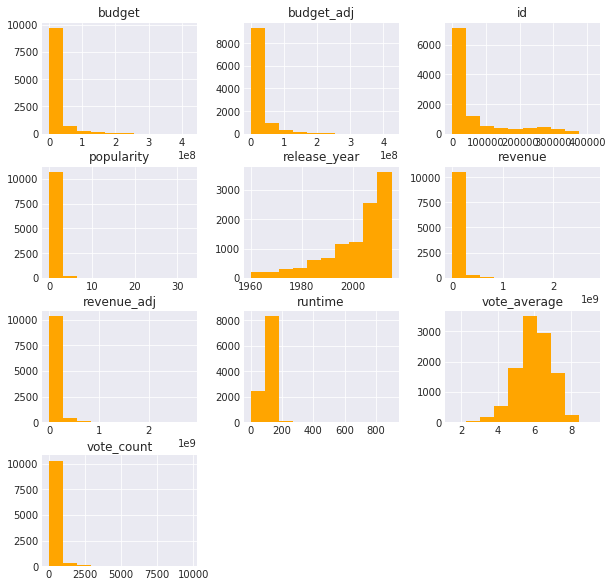

In [47]:
df.hist(color='orange',figsize=(10,10));

> From the histograms we can see that the budget, popularity, revenue, runtime, and vote_count are right skewed while the release year is left skewed and the vote_average has an almost normal distribution.

> So from the general properties i need to do the following steps to clean the data: <br />
      Drop a few columns that i wont need. <br />
      **Production** has alot of missing data. <br />
      i also removed the duplicates in the general properties but it was only one duplicate.

<a id='wrangling'></a>
### Data Cleaning

 

In [48]:
labels=['id','imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','keywords']
df.drop(labels,axis=1,inplace=True)

In [49]:
df.shape

(10865, 13)

> I dropped all the non essential columns form the dataset and confirmed that the number of columns has changed from 21 to 13

In [50]:
df.dropna(axis=0,inplace=True)

In [51]:
df.shape

(9772, 13)

In [52]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

>I dropped all NaN values to have a clean dataset this could have been also solved with an extensive internet search but for time sake i won't do that here. i also checked the dataset to find its now size and to make sure i have no more null values.

>All the columns are named with a lowercase letter and the names are separated by "_" so i wont need to rename any of them

In [53]:
# Convert release_date to actual time values
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


>Converted the release date from numpy.int 64 to date time to make them more suitable for manipulation.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: What is the relashionship between review score and budget?

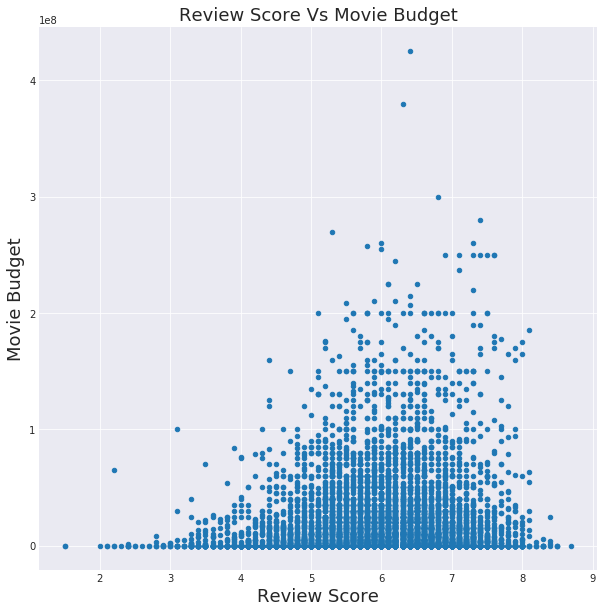

In [54]:
df.plot(x='vote_average',y='budget',kind='scatter',figsize=(10,10))
plt.title('Review Score Vs Movie Budget',fontsize=18)
plt.xlabel('Review Score',fontsize=18)
plt.ylabel('Movie Budget',fontsize=18);

> From this graph we can see an almost normal distribution between budget and review score althoght it is left skewed a bit. we can also clearly see a relation between the budget and the review score with movies that had review scores higher than 6.5 mostly have lower budget while movies that had average score had a much higher budget. we can also see that the movies with review scores lower than 6.5 generally have low budgets.

### Q2: What is the relashionship between review score and popularity?

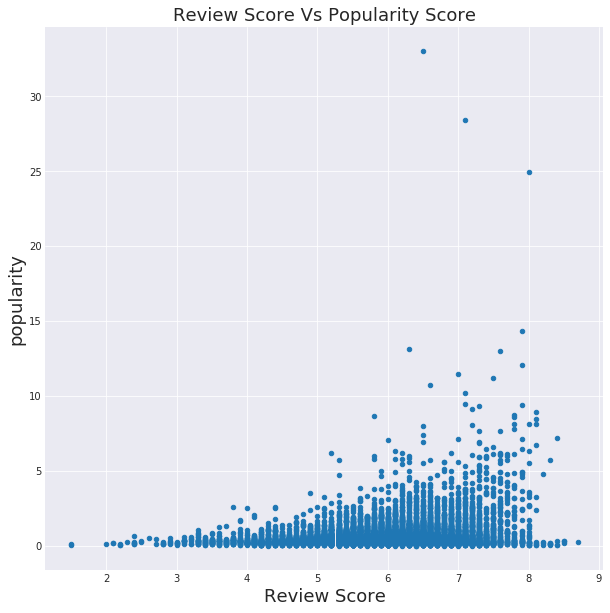

In [55]:
df.plot(x='vote_average',y='popularity',kind='scatter',figsize=(10,10))
plt.title('Review Score Vs Popularity Score',fontsize=18)
plt.xlabel('Review Score',fontsize=18)
plt.ylabel('popularity',fontsize=18);

>From this graph we can clearly see the relationship between review scores and popularity scores is mostly positive and left skewed which means that popular movies generally have high review scores.

### Q3: what is the relashionship between review score and revenue?

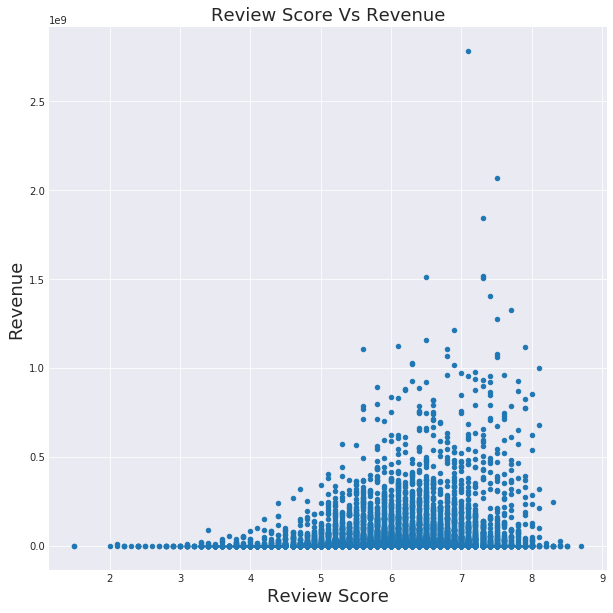

In [56]:
df.plot(x='vote_average',y='revenue',kind='scatter',figsize=(10,10))
plt.title('Review Score Vs Revenue',fontsize=18)
plt.xlabel('Review Score',fontsize=18)
plt.ylabel('Revenue',fontsize=18);

>This graph demonstrates the relationship between the review scores and movie revenues, it can be seen that the relation has a positive correlation meaning that as the review scores increase the revenue of the movie increase especially after the 6.5 mark. its also noticable that the graph is left skewed.

### Q4: what is the relashionship between popularity and revenue?

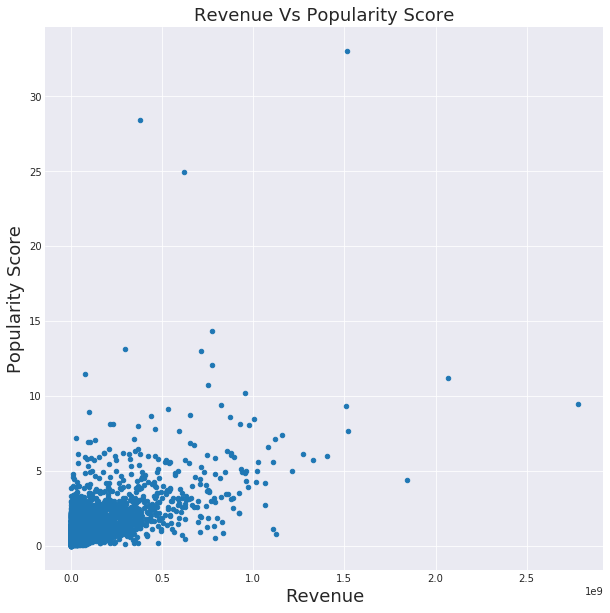

In [57]:
df.plot(x='revenue',y='popularity',kind='scatter',figsize=(10,10))
plt.title('Revenue Vs Popularity Score',fontsize=18)
plt.xlabel('Revenue',fontsize=18)
plt.ylabel('Popularity Score',fontsize=18);

> From the graph it would appears that the relation between the popularity score and the revenue is clumbed between the 10 mark on the y-axis and the 1.5 on the x-axis which means we need a closer look at that range.

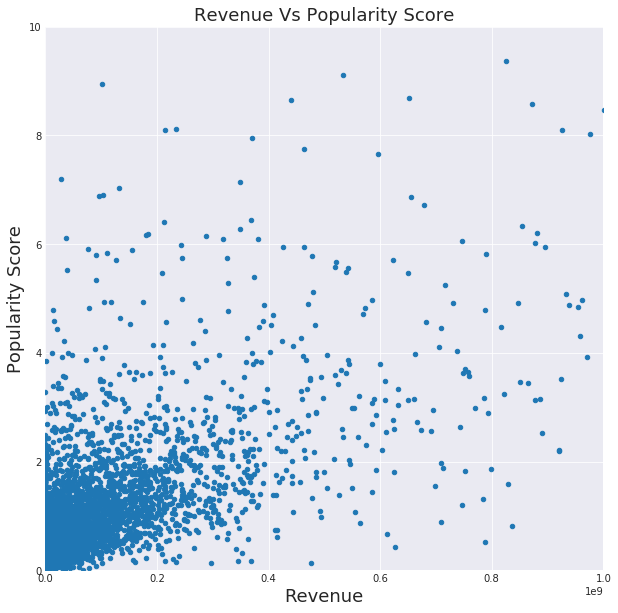

In [58]:
df.plot(x='revenue',y='popularity',kind='scatter',figsize=(10,10))
plt.title('Revenue Vs Popularity Score',fontsize=18)
plt.xlabel('Revenue',fontsize=18)
plt.ylabel('Popularity Score',fontsize=18)
plt.xlim(0,1e9)      #to limit the x-axis between the range
plt.ylim(0,10);      #to limit the y-axis between 0 to 10b

>With the zoomed in view and after discarding the outliers we can see a positive corelation between the revenue and popularity.

### Q5: what is the relashionship between popularity and budget?

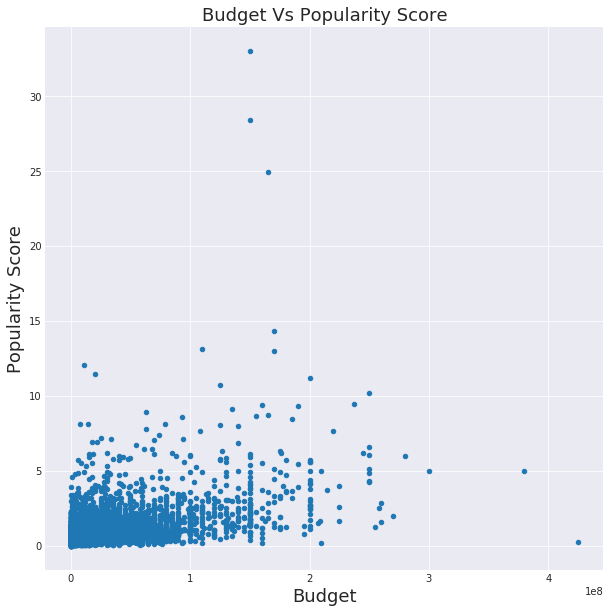

In [59]:
df.plot(x='budget',y='popularity',kind='scatter',figsize=(10,10))
plt.title('Budget Vs Popularity Score',fontsize=18)
plt.xlabel('Budget',fontsize=18)
plt.ylabel('Popularity Score',fontsize=18);

>From this curve we can see that the budget of the movie is positively correlated with the popularity scores.

### Q6: Who are the top ten directors in respect to revenue, reviews and popularity?

In [117]:
def top_ten(column):
    top = df.sort_values(by=[column],ascending=False)
    return top.head(10)

>Since i would need to find the top ten directors with respect to the revenue, ratings, and popularity i created a function that sortes the top ten in order to save time and have code reusability.

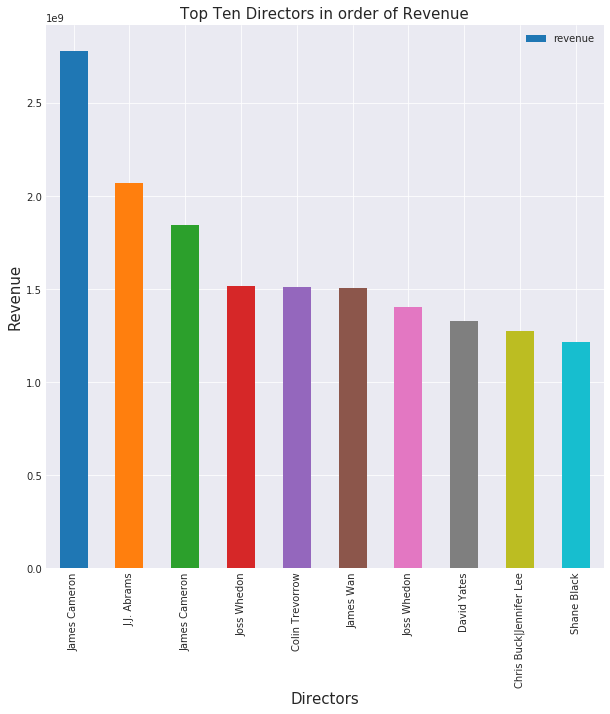

In [123]:
director_rev = top_ten('revenue')
director_rev.plot(x='director',y='revenue',kind='bar',figsize=(10,10))
plt.title('Top Ten Directors in order of Revenue',fontsize=15)
plt.xlabel('Directors',fontsize=15)
plt.ylabel('Revenue',fontsize=15);

> It appears the the top ten directors who generate the highest revenues for movies are (James Cameron, J.J. Abrams, Joss Whedon, Colin Trevorrow, James Wan, David Yates, Chris Buck with Jennifer Lee, and finally Shane Black) these include James Cameron and Joss Whedon twice each which means that a movie directed by those directors has a high probability of generating high revenues. 

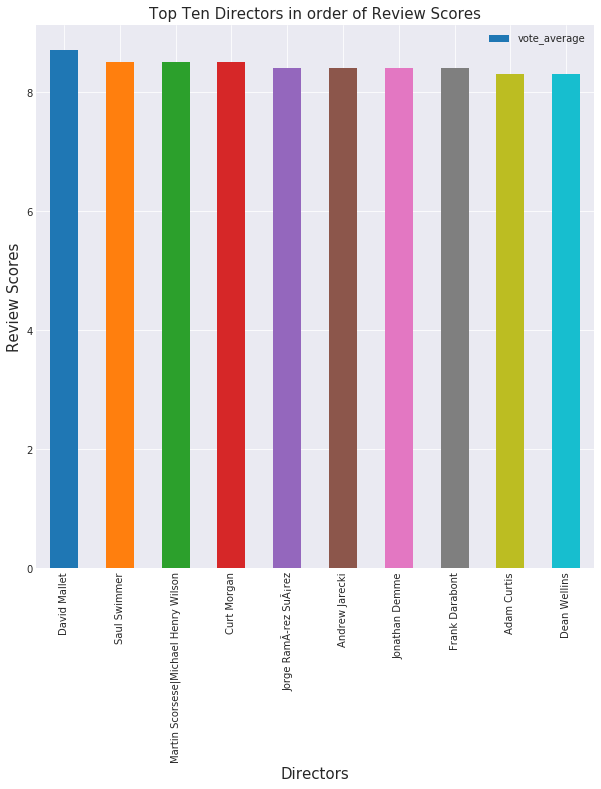

In [124]:
director_rate = top_ten('vote_average')
director_rate.plot(x='director',y='vote_average',kind='bar',figsize=(10,10))
plt.title('Top Ten Directors in order of Review Scores',fontsize=15)
plt.xlabel('Directors',fontsize=15)
plt.ylabel('Review Scores',fontsize=15);

> The directors that have the higest review scores are (David Mallet, Saul Swimmer, Martin Scorsese with Michael Henry Wilson, Curt Morgan, Jorge RamÃrez SuÃ¡rez, Andrew Jarecki, Jonathan Demme, Frank Darabont, Adam Curtis, and finally Dean Wellins) which is interesting as it appears the the movie directors with the highest review scores are not the same ones that generate the highest revenues.

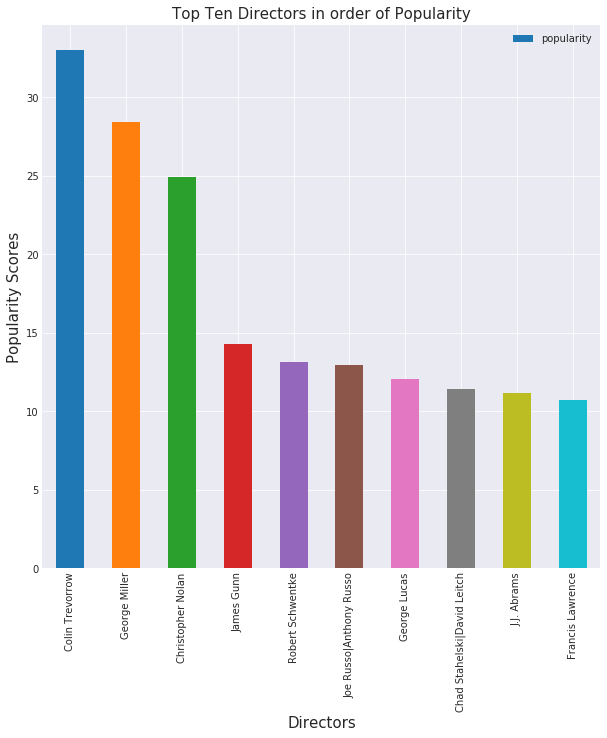

In [125]:
director_pop = top_ten('popularity')
director_pop.plot(x='director',y='popularity',kind='bar',figsize=(10,10))
plt.title('Top Ten Directors in order of Popularity',fontsize=15)
plt.xlabel('Directors',fontsize=15)
plt.ylabel('Popularity Scores',fontsize=15);

>The directors who are most popular are (Colin Trevorrow, George Miller, Christopher Nolan, James Gunn, Robert Schwentke, Joe Russo with Anthony Russo, George Lucas, Chad Stahelski with David Leitch, J.J. Abrams, and finally Francis Lawrence) which intersects a lot with the revenues and not with the review scores. i appears that the movies with the more popular directors have a higher propability of generating higher revenues than the directors who are critically acclaimed.

<a id='conclusions'></a>
## Conclusions

> From the data and the graphs we can conclude several points: <br />
**a)** The popularity score has its lowest value is around 0.6 while its highest value is nearing 33 (popularity doesn't have an upper limit according to the dataset documents) and it has a mean of about 0.6 while 75% of its data is above 0.7 which means that the maximum popularity is limited to a very low 25% or less.<br />
 <br />
**b)** The budget has a maximum value of 425 million dollars and averages around 14.6 million dollars. increasing the budget seems to have a positive effect on the review scores overall with movies that had review scores higher than 6.5 mostly have lower budget while movies that had average score had a much higher budget. we can also see that the movies with review scores lower than 6.5 generally have low budgets. the budget of the movie is also positively correlated with the popularity scores.<br />
<br />
**c)** The revenue has a maximum value of 2.78 billion dollars and averages around 40 million dollars.the relationship between the review scores and movie revenues has a positive correlation meaning that as the review scores increase the revenue of the movie increase especially after the 6.5 mark, there is also a positive corelation between the revenue and popularity.<br />
<br />
**d)** The runtime of movies max at 900 minutes and averages around 102 minutes with 25% of the movies having a runtime of 90 min, 50% around 99 min, and 75% around 111 minutes.<br />
<br />
**e)** The vote count maxes at 9767 voters and has a minimum value at 10 voters which is very low with the average number of voters per movie being 217 voters 25% of the movies have about 17 voters, 50% around 38 voters, and 75% around 146 voters.<br />
<br />
**f)** The movie rating or vote_average maxes at 9.2/10 for the best movie and is 1.5/10 for the worst movie while about 25% of the movies get 5.4/10, 50% get 6/10 and 75% get 6.6/10 with an average total score of 6/10. the review scores and popularity scores have a mostly positive correlation which means that popular movies generally have high review scores.<br />
<br />
**g)** it is observed also that the movies with the more popular directors like (J.J Abrams) have a higher propability of generating higher revenues than the directors who are critically acclaimed.


### Limitations
> one of the limitations was the null fields in the cast,directors,genres,production_companies column but it can probably be solved with a quick internet search. 


In [130]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0